In [1]:
import requests
import pandas as pd

In [2]:
start='2022-03-02'
to='2022-04-01'
myurl='https://transparency.entsog.eu/api/v1/aggregateddata.xlsx?forceDownload=true&pointDirection=ro---------ro-tso-0001entrytransmission,ro---------ro-tso-0001entrytransmissionbg-ngts----,ro---------ro-tso-0001exitfinal%20consumers,ro---------ro-tso-0001entrytransmissionhu---------,ro-tbp-----ro-tso-0001exittransmission,ro---------ro-tso-0001exittransmission,ro-tbp-----ro-tso-0001exittransmissionbg-ngts----,ro---------ro-tso-0001entrystorage,ro---------ro-tso-0001exitdistribution,ro---------ro-tso-0001exittransmissionhu---------,ro---------ro-tso-0001entryproduction,ro---------ro-tso-0001exitstorage,ro-tbp-----ro-tso-0001entrytransmission,ro-tbp-----ro-tso-0001entrytransmissionbg-ngts----,ro---------ro-tso-0001exittransmissionbg-ngts----&from={}&to={}&indicator=Physical%20Flow&periodType=day&timezone=CET&limit=-1'.format(start,to)
response=requests.get(myurl)
print(response)

<Response [200]>


In [3]:
df=pd.read_excel(myurl)
print(df)

                                                    id  dataSet dataSetLabel  \
0    1AggregatesRORO---------RO-TSO-0001entryProduc...        1   Aggregates   
1    1AggregatesRORO---------RO-TSO-0001entryStorag...        1   Aggregates   
2    1AggregatesRORO---------RO-TSO-0001entryTransm...        1   Aggregates   
3    1AggregatesRORO---------RO-TSO-0001entryTransm...        1   Aggregates   
4    1AggregatesRORO---------RO-TSO-0001entryTransm...        1   Aggregates   
..                                                 ...      ...          ...   
398  1AggregatesRORO---------RO-TSO-0001exitStorage...        1   Aggregates   
399  1AggregatesRORO---------RO-TSO-0001exitTransmi...        1   Aggregates   
400  1AggregatesRORO---------RO-TSO-0001exitTransmi...        1   Aggregates   
401  1AggregatesRORO---------RO-TSO-0001exitTransmi...        1   Aggregates   
402  1AggregatesRORO-TBP-----RO-TSO-0001exitTransmi...        1   Aggregates   

         indicator periodType        pe

In [4]:
df_subset=df[['directionKey','day','value']]
print(df_subset)

    directionKey  day         value
0          entry    2  2.351019e+08
1          entry    2  1.400778e+08
2          entry    2  5.565940e+07
3          entry    2  2.922379e+07
4          entry    2  0.000000e+00
..           ...  ...           ...
398         exit    1  7.617844e+07
399         exit    1  0.000000e+00
400         exit    1  0.000000e+00
401         exit    1  2.449863e+07
402         exit    1  0.000000e+00

[403 rows x 3 columns]


In [5]:
values_by_entry=df_subset.pivot_table(index=['day','directionKey'])
print(values_by_entry)

                         value
day directionKey              
1   entry         4.968222e+07
    exit          4.461546e+07
2   entry         7.667716e+07
    exit          6.612925e+07
3   entry         7.576420e+07
...                        ...
29  exit          5.433447e+07
30  entry         6.495875e+07
    exit          5.441275e+07
31  entry         6.401450e+07
    exit          5.372339e+07

[62 rows x 1 columns]


<AxesSubplot:xlabel='day,directionKey'>

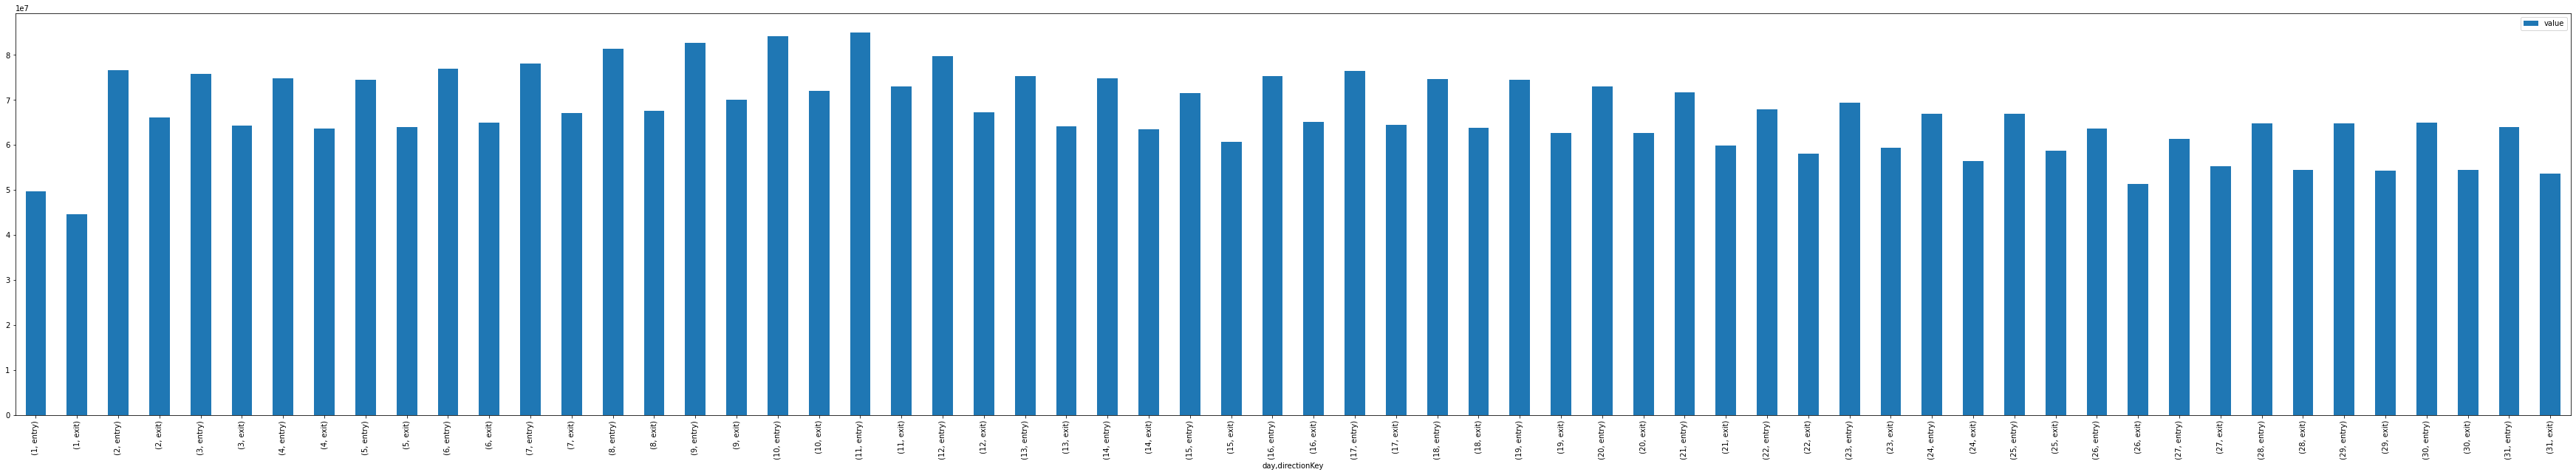

In [6]:
values_by_entry.plot(kind='bar',figsize=(62,10))